# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **0.5p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **0.5p**

- Check for missing values and report the number and percentage of missing data for each column. **0.5p**

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. **0.5p**

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. **0.5p**

- Identify outliers in at least one numerical column using boxplots. **0.5p**

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. **0.5p**

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. **0.5p**

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. **0.5p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **0.5p**

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [54]:
import pandas as pd

In [55]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age  workclass  fnlwgt     education  education-num  \
22151   20    Private  278155  Some-college             10   
15840   27    Private  205440          10th              6   
28199   25    Private  231714  Some-college             10   
9997    21    Private  319163  Some-college             10   
19644   50    Private   33304       HS-grad              9   
7703    20    Private  184756  Some-college             10   
2026    47    Private  194772     Assoc-voc             11   
9617    60    Private  128367  Some-college             10   
29502   25  Local-gov  476599     Bachelors             13   
14958   52  Local-gov  108083       Masters             14   

           marital-status         occupation   relationship   race     sex  \
22151       Never-married       Adm-clerical      Own-child  White    Male   
15840  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
28199  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
9997        Never-married   Transport-moving      Own-child  Black    Male   
19644  Married-civ-spouse       Craft-repair        Husband  White    Male   
7703        Never-married       Adm-clerical      Own-child  White  Female   
2026   Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
9617             Divorced     Prof-specialty      Unmarried  White    Male   
29502       Never-married     Prof-specialty  Not-in-family  White  Female   
14958  Married-civ-spouse     Prof-specialty        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
22151             0             0              40  United-States  <=50K  
15840             0             0              40  United-States  <=50K  
28199             0             0              40  United-States  <=50K  
9997              0             0              40  United-States  <=50K  
19644             0             0              40  United-States   >50K  
7703              0             0              12  United-States  <=50K  
2026              0             0              40  United-States   >50K  
9617           3325             0              42  United-States  <=50K  
29502             0             0              40  United-States  <=50K  
14958             0             0              50  United-States   >50K

# Importing libraries

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Hours Per Week Target Distribution

In [57]:
from scipy.stats import skew, kurtosis, zscore, norm, kstest

def analyze_hours_per_week(data, column="hours-per-week"):
    """
    We conduct an Exploratory Data Analysis (EDA) on the target variable, 'hours-per-week,' encompassing the following analytical procedures:

    - Visualization of the distribution through a histogram with an overlaid normal distribution curve.
    - Representation of the probability density function using Kernel Density Estimation (KDE).
    - Computation of skewness and kurtosis, accompanied by their respective interpretations.
    - Detection of outliers through the Interquartile Range (IQR) and Z-score methodologies.
    - Construction of a boxplot to facilitate the visualization of outlier distribution.
    - Deployment of a violin plot to capture the overall distribution shape and density variations.
    - Generation of a Quantile-Quantile (Q-Q) plot to assess the normality of the data.
    - Kolmogorov-Smirnov Test to evaluate the normality of the data distribution.
    """

    # Computing Descriptive Statistics
    mu = np.mean(data[column])
    sigma = np.std(data[column])
    skewness = skew(data[column])
    kurt = kurtosis(data[column])

    print(f"\n**Summary Statistics for {column}:**")
    print(f"Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}")

    # Skewness Interpretation
    if -0.5 <= skewness <= 0.5:
        skew_interpretation = "Approximately symmetric"
    elif -1 <= skewness < -0.5:
        skew_interpretation = "Moderately left-skewed"
    elif 0.5 < skewness <= 1:
        skew_interpretation = "Moderately right-skewed"
    elif skewness < -1:
        skew_interpretation = "Highly left-skewed"
    else:
        skew_interpretation = "Highly right-skewed"

    print(f"Skewness: {skewness:.2f} â†’ {skew_interpretation}")

    # Kurtosis Interpretation (Using Excess Kurtosis)
    excess_kurt = kurt - 3  # Excess kurtosis relative to a normal distribution
    if -1 <= excess_kurt <= 1:
        kurt_interpretation = "Approximately normal (mesokurtic)"
    elif excess_kurt > 1:
        kurt_interpretation = "Heavy-tailed (leptokurtic, more extreme values)"
    else:
        kurt_interpretation = "Light-tailed (platykurtic, fewer extreme values)"

    print(f"Kurtosis: {kurt:.2f} â†’ {kurt_interpretation}")

    # Plot Histogram with Normal Distribution Overlay
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, stat="density", color="purple", edgecolor="black", kde=True, alpha=0.6, label="Histogram")

    # Overlay Normal Distribution Curve
    x = np.linspace(min(data[column]), max(data[column]), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), color="yellow", linestyle="dashed", linewidth=2, label="Normal Distribution")

    plt.xlabel("Hours per Week")
    plt.ylabel("Density")
    plt.title(f"Histogram with Normal Distribution of {column}")
    plt.legend()
    plt.show()

    # Plot KDE Density Separately
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[column], color="purple", linewidth=2.5, fill=True, alpha=0.3, label="KDE Density Curve")

    plt.xlabel("Hours per Week")
    plt.ylabel("Density")
    plt.title(f"Density Plot of {column}")
    plt.legend()
    plt.show()

    # Outlier Detection - IQR Method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\n Outliers detected using IQR Method: {len(outliers_iqr)}")
    print(f" - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    # Outlier Detection - Z-score Method
    z_scores = zscore(data[column])
    outliers_z = data[np.abs(z_scores) > 3]
    print(f" Outliers detected using Z-score Method (>|3| standard deviations): {len(outliers_z)}")

    # Plot Boxplot for Outlier Visualization
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column], color="purple")
    plt.xlabel("Hours per Week")
    plt.title(f"Boxplot for Outlier Detection in {column}")
    plt.show()

    # Plot Violin Plot for Distribution Shape
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=data[column], color="purple")
    plt.xlabel("Hours per Week")
    plt.title("Violin Plot of Hours per Week")
    plt.show()

    # Kolmogorov-Smirnov Test for Normality
    ks_stat, ks_p = kstest(data["hours-per-week"], "norm", args=(np.mean(data["hours-per-week"]), np.std(data["hours-per-week"])))

    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

    if ks_p > 0.05:
        print(" Fail to reject H0: Data does not significantly deviate from normality.")
    else:
        print(" Reject H0: Data significantly deviates from normality.")




**Summary Statistics for hours-per-week:**
Mean: 40.44, Standard Deviation: 12.35
Skewness: 0.23 â†’ Approximately symmetric
Kurtosis: 2.92 â†’ Approximately normal (mesokurtic)


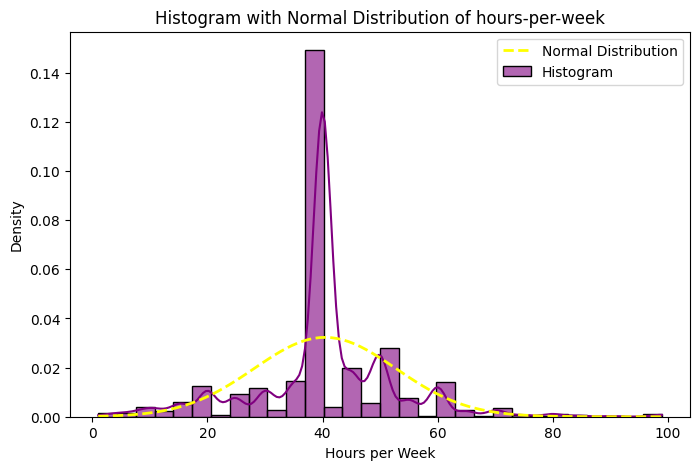

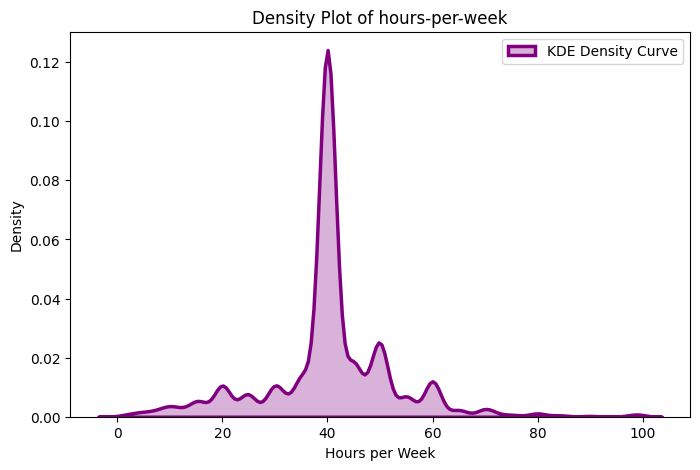


 Outliers detected using IQR Method: 9008
 - Lower Bound: 32.50, Upper Bound: 52.50
 Outliers detected using Z-score Method (>|3| standard deviations): 440


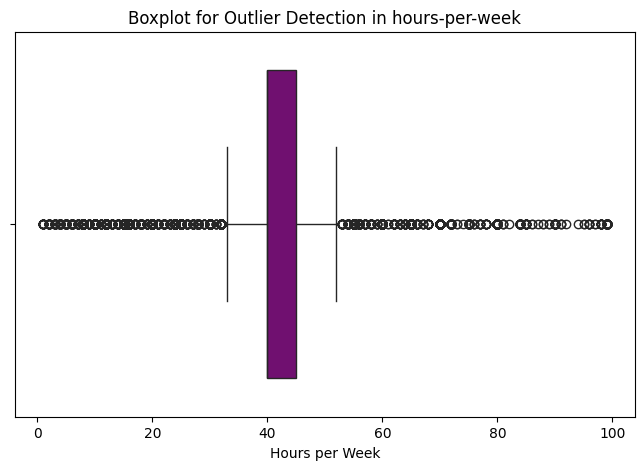

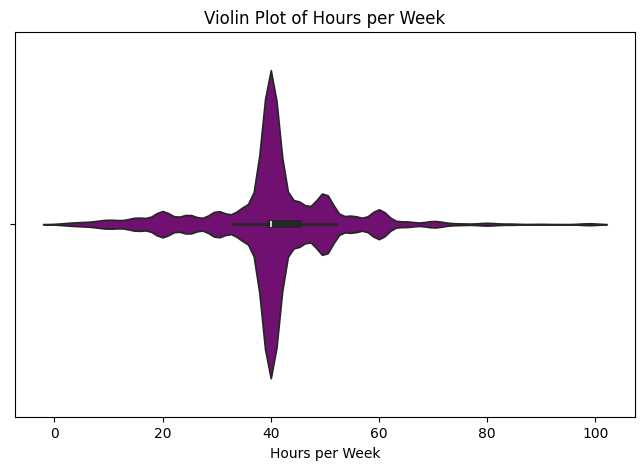

Kolmogorov-Smirnov Test: Statistic = 0.2475, p-value = 0.0000
 Reject H0: Data significantly deviates from normality.


In [58]:
analyze_hours_per_week(data)

## Summary report of Hours Per Week Target variable distribution

The target variable, hours-per-week, was analyzed for its distribution and statistical properties. The mean number of hours worked per week was 40.44 (SD=12.35), indicating moderate variability in the data. The skewness of 0.23 suggested an approximately symmetric distribution, while the kurtosis of 2.92 indicated a light platycurtic shape. However, the Kolmogorov-Smirnov test revealed a significant deviation from normality (SD=0.247, p<.001), leading to the rejection of the null hypothesis that the data is normally distributed.

A histogram with an overlaid normal distribution curve illustrated that while the data has a strong central peak around 40 hours per week, it exhibits deviations from normality, with smaller peaks suggesting potential subgroups within the dataset. The kernel density estimate (KDE) plot further supported this observation, showing a high density at 40 hours per week, with additional peaks at higher values, reinforcing a multimodal tendency.

The boxplot highlighted the presence of extreme values, as numerous data points fell outside the whiskers, suggesting outliers. The violin plot provided a deeper visualization of the density distribution, confirming that the central clustering around 40 hours per week is the most prominent, while extreme values exhibit a much lower frequency.

Outliers were identified using two methods: the interquartile range (IQR) method detected 9,008 outliers (lower bound = 32.50, upper bound = 52.50), and the Z-score method identified 440 outliers (values exceedingâˆ£3âˆ£ standard deviations from the mean). These findings suggest the presence of extreme values in the dataset, which may warrant further investigation or data transformation.

# Descriptive Statistics of the Dataset

In [59]:

# Computeing numerical statistics
numerical_stats = data.describe(include=[np.number])

# Adding the median row separately
numerical_stats.loc["median"] = data.median(numeric_only=True)

# Computing categorical statistics separately
categorical_stats = data.describe(include=[object])

# Displaying results
print(" Numerical Statistics (with Median):")
print(numerical_stats)

print("\n Categorical Statistics:")
print(categorical_stats)


 Numerical Statistics (with Median):
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count   32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean       38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std        13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min        17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%        28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%        37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%        48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max        90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
median     37.000000  1.783560e+05      10.000000      0.000000      0.000000   

        hours-per-week  
count     32561.000000  
mean         40.437456  
std          12.347429  
min           1.000000  
25%          40.000000  
50

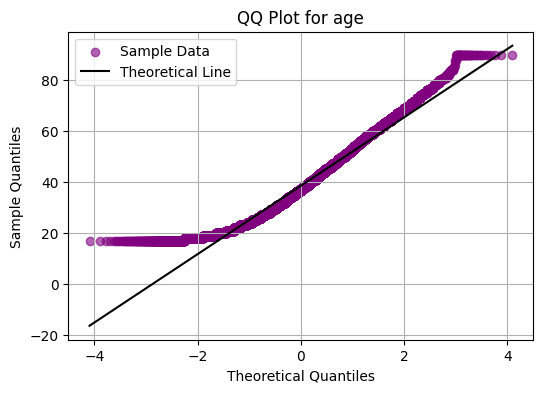

Kolmogorov-Smirnov Test for age:
  KS Statistic: 0.0631
  p-value: 0.0000
----------------------------------------


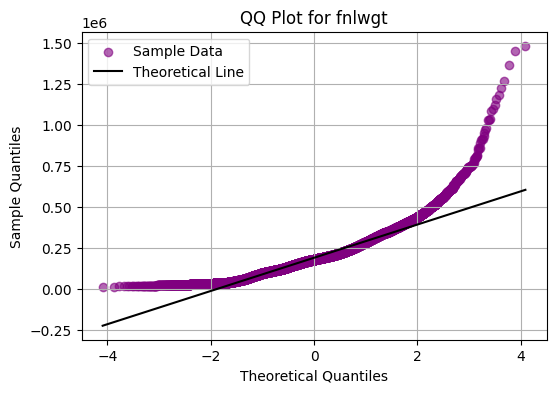

Kolmogorov-Smirnov Test for fnlwgt:
  KS Statistic: 0.0904
  p-value: 0.0000
----------------------------------------


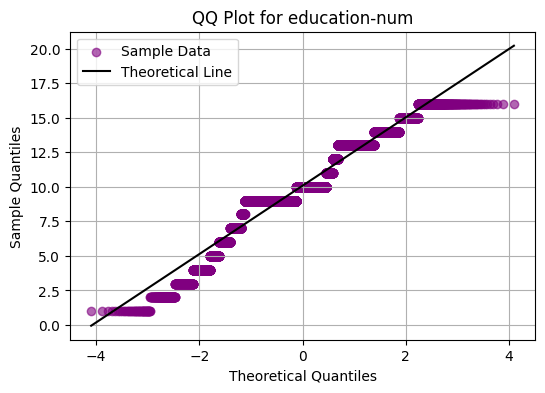

Kolmogorov-Smirnov Test for education-num:
  KS Statistic: 0.2066
  p-value: 0.0000
----------------------------------------


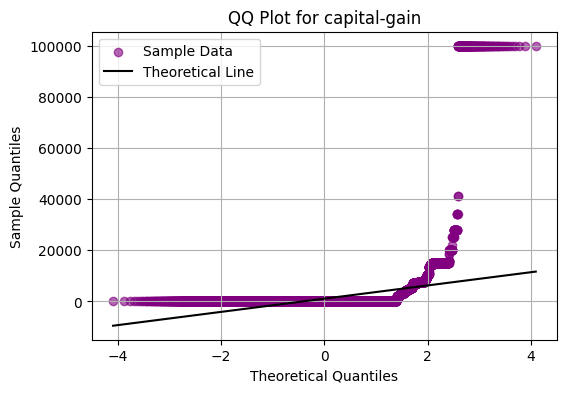

Kolmogorov-Smirnov Test for capital-gain:
  KS Statistic: 0.4747
  p-value: 0.0000
----------------------------------------


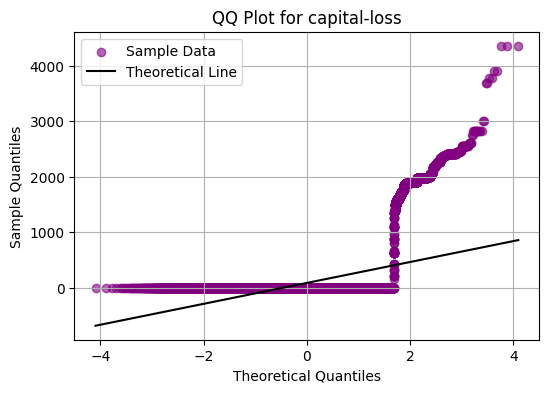

Kolmogorov-Smirnov Test for capital-loss:
  KS Statistic: 0.5391
  p-value: 0.0000
----------------------------------------


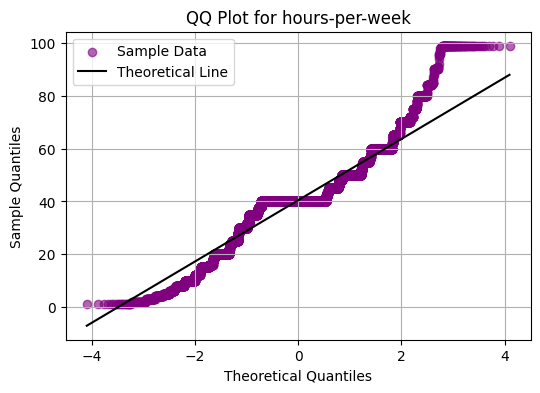

Kolmogorov-Smirnov Test for hours-per-week:
  KS Statistic: 0.2475
  p-value: 0.0000
----------------------------------------


In [60]:
# Selecting numerical columns
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Performing QQ plots and Kolmogorov-Smirnov test for each numerical column
for col in numerical_cols:
    column_data = data[col].dropna()  # Dropping NaN values
    
    # QQ Plot
    plt.figure(figsize=(6, 4))
    (osm, osr), (slope, intercept, r) = stats.probplot(column_data, dist="norm")
    plt.scatter(osm, osr, color='purple', alpha=0.6, label="Sample Data")  # Purple QQ dots
    plt.plot(osm, slope * osm + intercept, color='black', label="Theoretical Line")  # Black line
    plt.title(f'QQ Plot for {col}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Kolmogorov-Smirnov Test
    ks_stat, p_value = stats.kstest(column_data, 'norm', args=(column_data.mean(), column_data.std()))

    # Printing results
    print(f"Kolmogorov-Smirnov Test for {col}:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print("-" * 40)

## Summary report of dataset characteristics

The average age of individuals in the dataset is 38.58 years (SD = 13.64), with a median of 37 years. The final weight (fnlwgt) variable has a mean of 189,778.4 (SD = 105,550), indicating substantial variability. The education-num variable, representing years of education, has a mean of 10.08 (SD = 2.57), with values ranging from 1 to 16. Capital-gain and capital-loss variables are highly skewed, with medians of 0 and maximum values of 99,999 and 4,356, respectively. To gain a better understanding of potential biases and modeling implications, we included the target variable (hours-per-week) in the normality assessment alongside other numerical features. The hours-per-week variable is centered around 40 hours (median = 40, SD = 12.35), with a maximum of 99 hours per week.

The most frequent workclass is Private (22,696 observations). The most common education level is HS-grad (10,501 observations). The majority of individuals are Married-civ-spouse (14,976 observations), with Husband being the most frequent relationship category (13,193 observations). The dataset is predominantly White (27,816 observations) and Male (21,790 observations). The most common native country is the United States (29,170 observations). The income distribution is skewed towards â‰¤50K, comprising 24,720 cases.

In addition to the required preprocessing steps, we explored normality assessment using QQ plots and the Kolmogorov-Smirnov (KS) test to evaluate the suitability of statistical modeling assumptions.

The results indicate significant departures from normality for all variables (p < .001). Capital-gain (KS = 0.4747) and capital-loss (KS = 0.5391) exhibited the strongest deviations, characterized by heavy right tails and clustering at zero. Education-num (KS = 0.2066) and hours-per-week (KS = 0.2475) also showed substantial deviations due to their discrete nature and extreme values. Age (KS = 0.0631) and fnlwgt (KS = 0.0904) demonstrated smaller, yet still significant, departures from normality.


# Missing Values

In [61]:

# Replacing "?" with NaN
data.replace("?", np.nan, inplace=True)

# Checking for missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Creating a DataFrame for better visualization
missing_report = pd.DataFrame({
    "Missing Values": missing_values, 
    "Percentage": missing_percent
})

# Displaing the missing values report
print(" Missing Values Report:")
print(missing_report)


 Missing Values Report:
                Missing Values  Percentage
age                          0    0.000000
workclass                 1836    5.638647
fnlwgt                       0    0.000000
education                    0    0.000000
education-num                0    0.000000
marital-status               0    0.000000
occupation                1843    5.660146
relationship                 0    0.000000
race                         0    0.000000
sex                          0    0.000000
capital-gain                 0    0.000000
capital-loss                 0    0.000000
hours-per-week               0    0.000000
native-country             583    1.790486
income                       0    0.000000


## Summary report on missing values

A missing values analysis revealed that workclass (5.64%), occupation (5.66%), and native-country (1.79%) contained missing data, while all other variables had complete observations.

# Histograms for numerical values

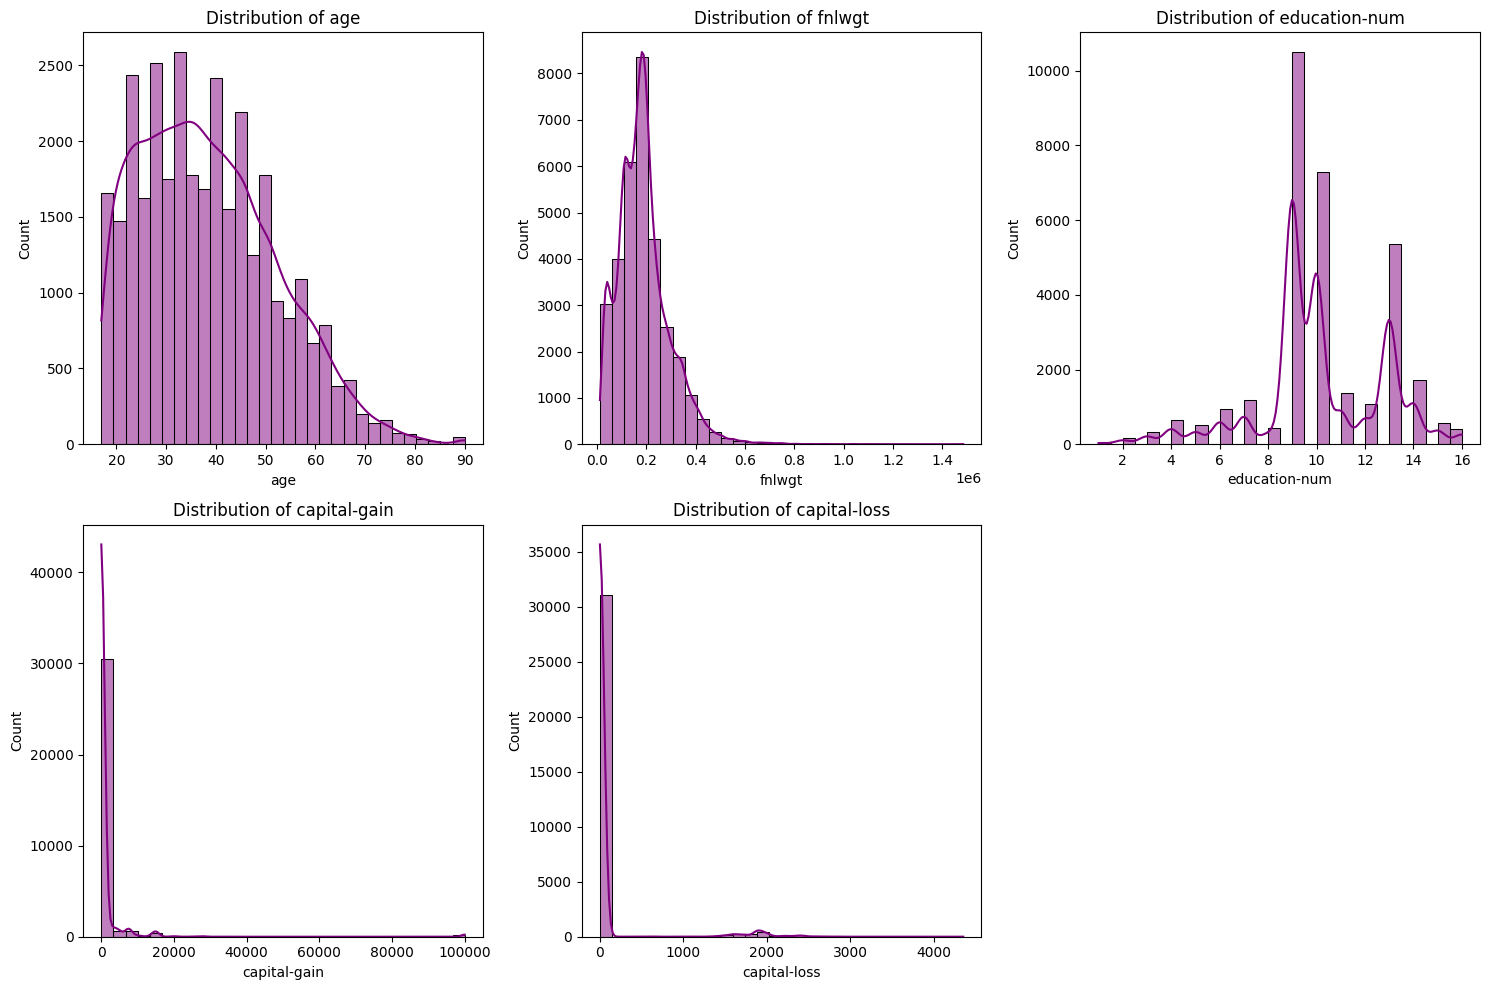

In [62]:
# Getting all numerical columns excluding the target variable
numerical_columns = [col for col in data.select_dtypes(include=[np.number]).columns if col != "hours-per-week"]

# Setting up the figure size dynamically
num_cols = len(numerical_columns)
plt.figure(figsize=(5 * min(num_cols, 3), 5 * (num_cols // 3 + 1)))

# Creating histograms for all numerical columns except the target variable
for i, col in enumerate(numerical_columns):
    plt.subplot((num_cols // 3) + 1, min(num_cols, 3), i + 1) 
    sns.histplot(data[col], bins=30, kde=True, color="purple", edgecolor="black")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [63]:
# Selecting numerical columns except 'hours-per-week'
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss"]

# Calculating and printing skewness and kurtosis
for col in numerical_cols:
    skewness = skew(data[col], nan_policy='omit')
    kurt = kurtosis(data[col], nan_policy='omit')
    
    print(f"{col}:")
    print(f"  Skewness: {skewness:.4f}")
    print(f"  Kurtosis: {kurt:.4f}")
    print("-" * 40)

age:
  Skewness: 0.5587
  Kurtosis: -0.1663
----------------------------------------
fnlwgt:
  Skewness: 1.4469
  Kurtosis: 6.2177
----------------------------------------
education-num:
  Skewness: -0.3117
  Kurtosis: 0.6232
----------------------------------------
capital-gain:
  Skewness: 11.9533
  Kurtosis: 154.7755
----------------------------------------
capital-loss:
  Skewness: 4.5944
  Kurtosis: 20.3735
----------------------------------------


## Summary report on Histograms for numerical data

The distribution of key numerical variables was analyzed using histograms with kernel density estimates and further examined through skewness and kurtosis calculations. Age follows a right-skewed distribution, with most individuals concentrated between 20 and 50 years (Skewness = 0.56, Kurtosis = -0.17). Final weight (fnlwgt) also exhibits strong right skewness (Skewness = 1.45, Kurtosis = 6.22), indicating a heavy-tailed distribution. Education-num displays a multimodal pattern, reflecting the structure of educational attainment levels, with slight left skewness (Skewness = -0.31, Kurtosis = 0.62).
Both capital-gain (Skewness = 11.95, Kurtosis = 154.78) and capital-loss (Skewness = 4.59, Kurtosis = 20.37) are highly right-skewed, with the majority of values concentrated at zero and a small number of extreme outliers.

# Barplots for Categorical data

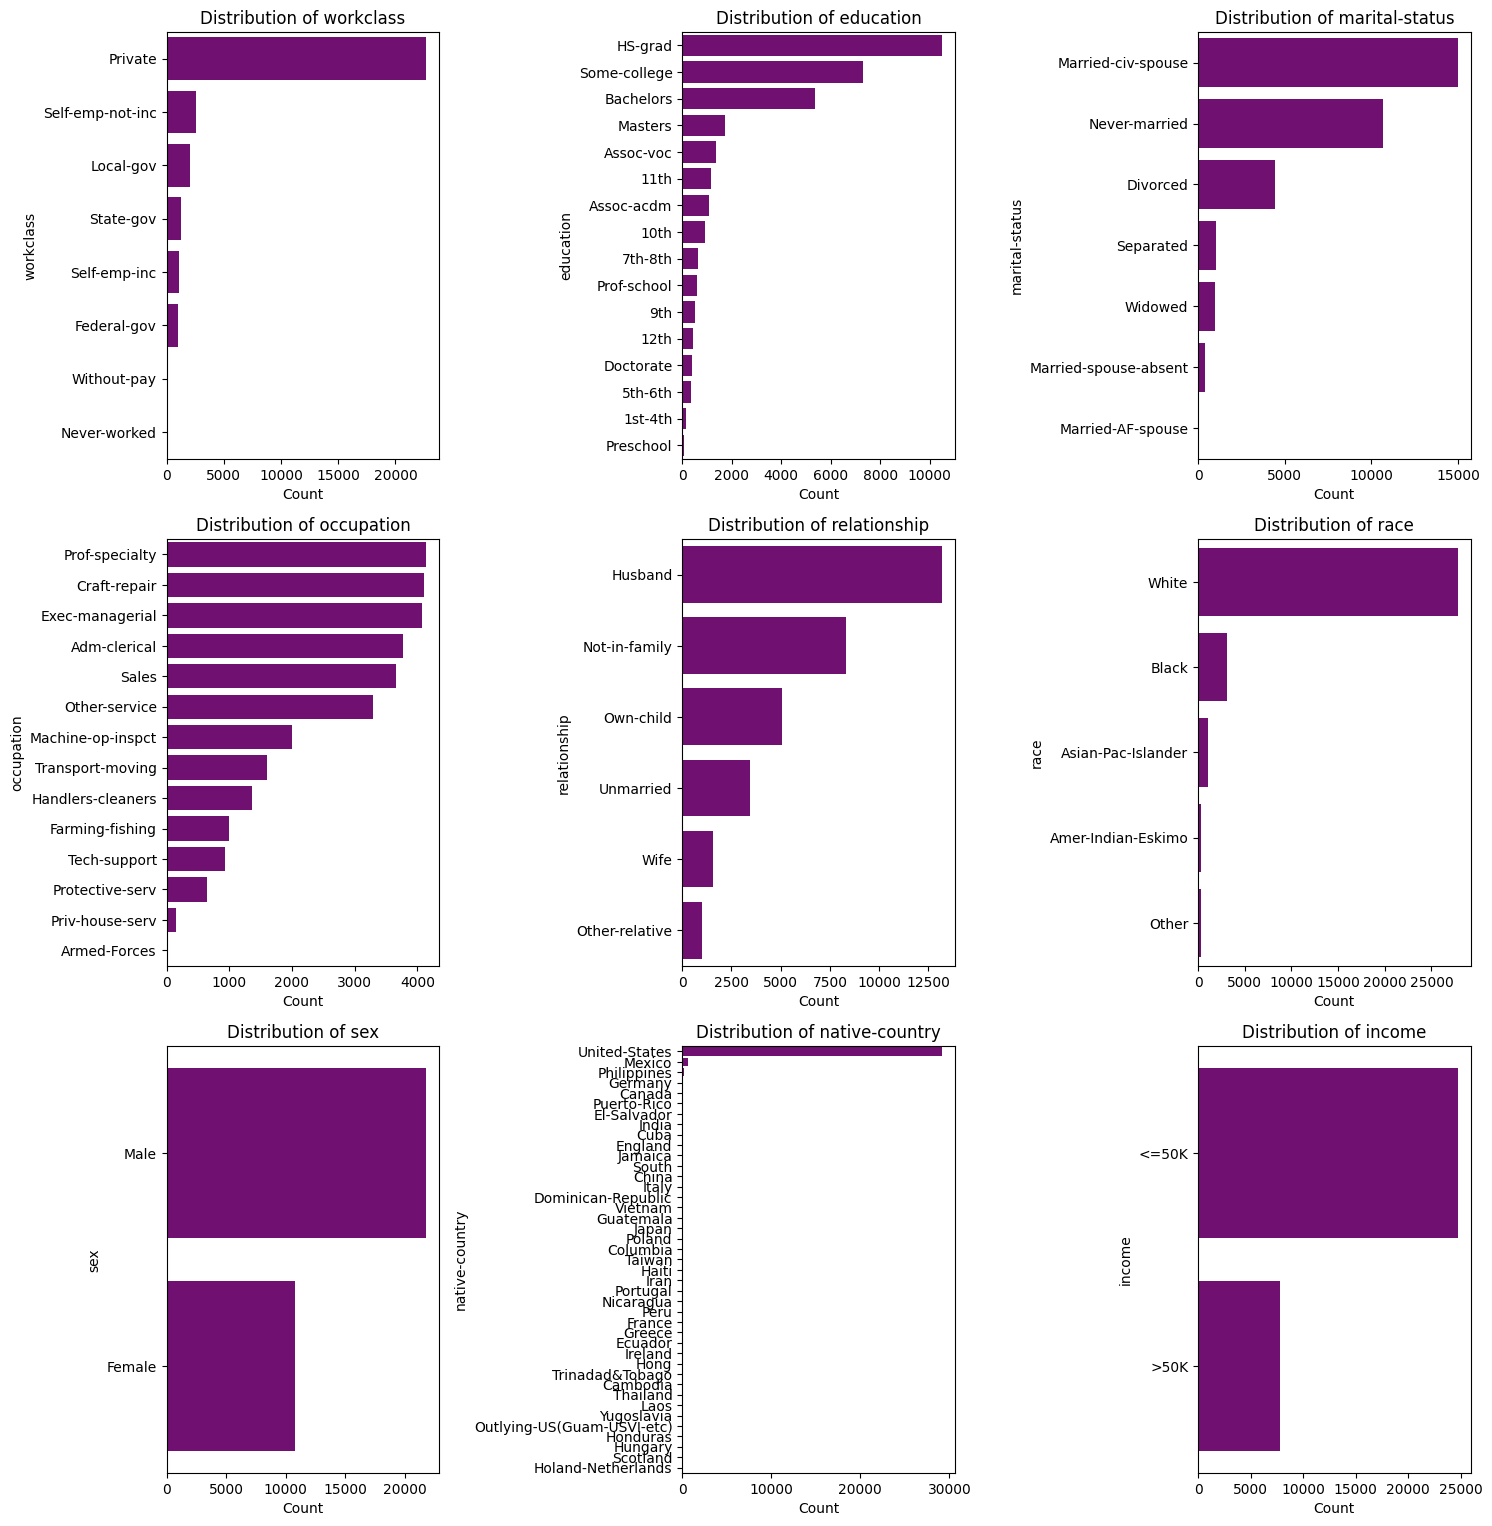

In [64]:
# Getting all categorical columns
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

# Setting up the figure size dynamically
num_cols = len(categorical_columns)
plt.figure(figsize=(5 * min(num_cols, 3), 5 * (num_cols // 3 + 1)))

# Creating bar plots for all categorical columns
for i, col in enumerate(categorical_columns):
    plt.subplot((num_cols // 3) + 1, min(num_cols, 3), i + 1)  # Adjust layout dynamically
    sns.countplot(y=data[col], order=data[col].value_counts().index, color="purple")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Summary report on categorical data
The distribution of categorical variables was analyzed, revealing dominant trends in key demographic and socio-economic factors. The majority of individuals work in the Private sector, have at least a high school education, and are married-civ-spouse. The most frequent occupation is professional specialty, while husband is the most common relationship status. The dataset is predominantly male and White, with the majority of individuals born in the United States. The income distribution is skewed towards â‰¤50K, indicating an imbalance that may affect predictive modeling.

# Outlier detection for numerical columns

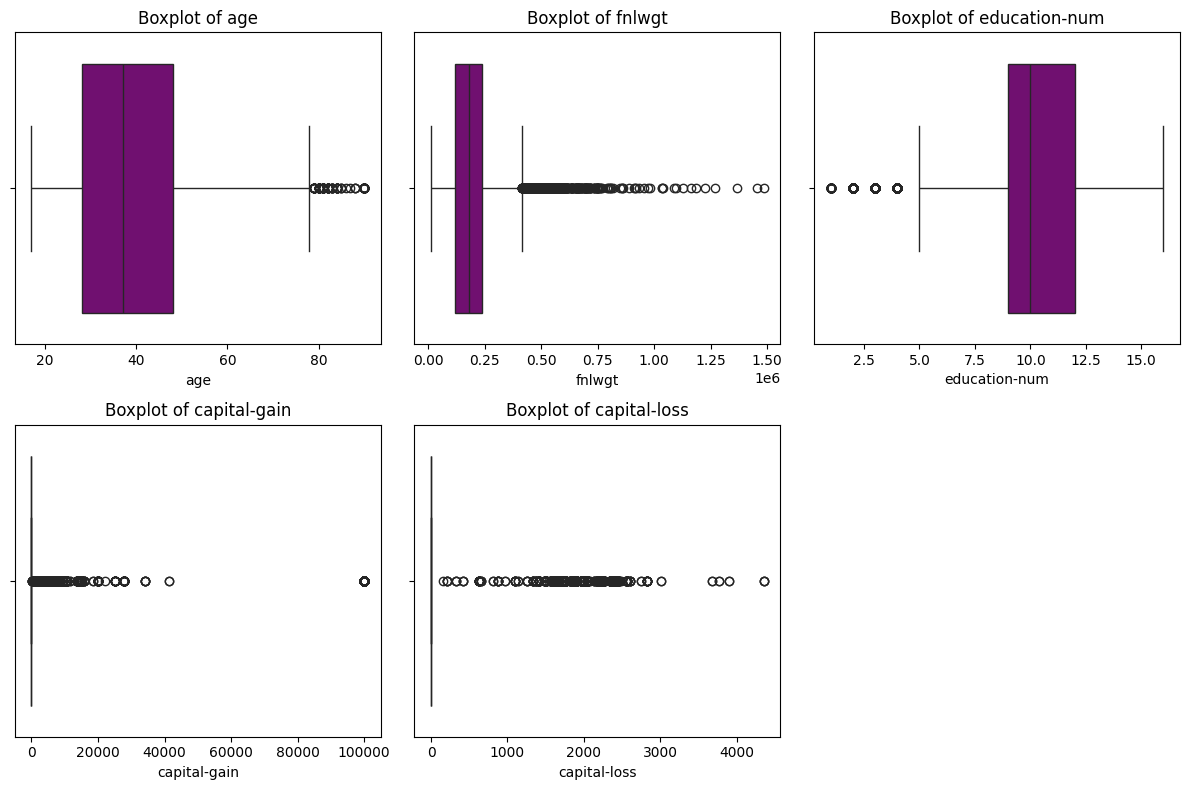

In [65]:

# Getting all numerical columns excluding the target variable
numerical_columns = [col for col in data.select_dtypes(include=[np.number]).columns if col != "hours-per-week"]

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating boxplots for all numerical columns except the target variable
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  
    sns.boxplot(x=data[col], color="purple")
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## Summary report on outliers 
Boxplots were used to identify outliers in key numerical variables. Age and education-num exhibit relatively symmetric distributions with minimal outliers. However, fnlwgt, capital-gain, and capital-loss show a significant number of extreme values, particularly at the upper end of their distributions. The presence of these outliers suggests potential data skewness

# Correlation matrix


 Pearson Correlation Matrix:
age: 1.00 | -0.08 | 0.04 | 0.08 | 0.06 | 0.07
fnlwgt: -0.08 | 1.00 | -0.04 | 0.00 | -0.01 | -0.02
education-num: 0.04 | -0.04 | 1.00 | 0.12 | 0.08 | 0.15
capital-gain: 0.08 | 0.00 | 0.12 | 1.00 | -0.03 | 0.08
capital-loss: 0.06 | -0.01 | 0.08 | -0.03 | 1.00 | 0.05
hours-per-week: 0.07 | -0.02 | 0.15 | 0.08 | 0.05 | 1.00


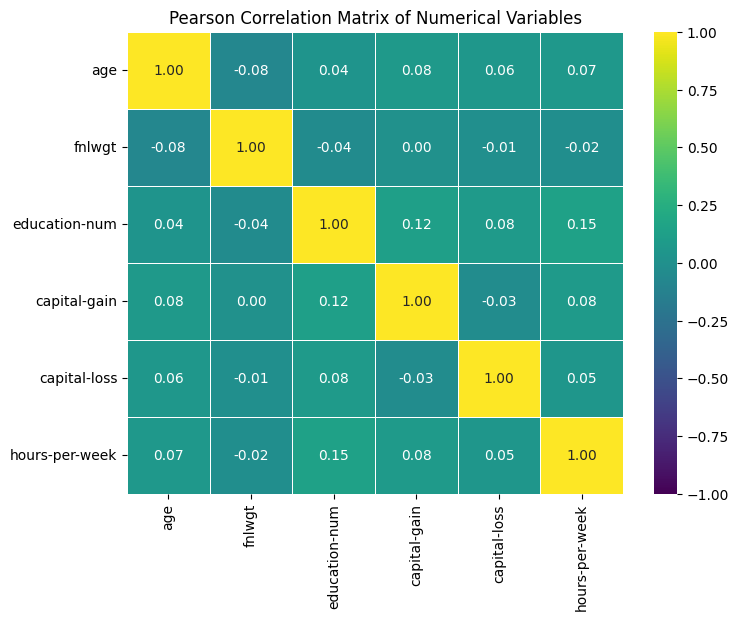


 Correlations with 'hours-per-week':
age: Pearson r = 0.0688
fnlwgt: Pearson r = -0.0188
education-num: Pearson r = 0.1481
capital-gain: Pearson r = 0.0784
capital-loss: Pearson r = 0.0543


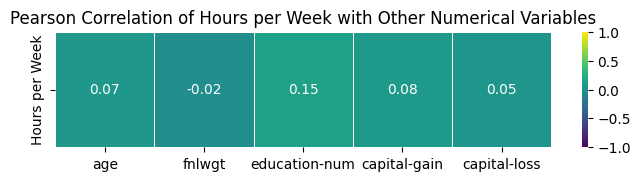


 P-Values for Correlations with 'hours-per-week':
age: p-value = 0.0000
fnlwgt: p-value = 0.0007
education-num: p-value = 0.0000
capital-gain: p-value = 0.0000
capital-loss: p-value = 0.0000


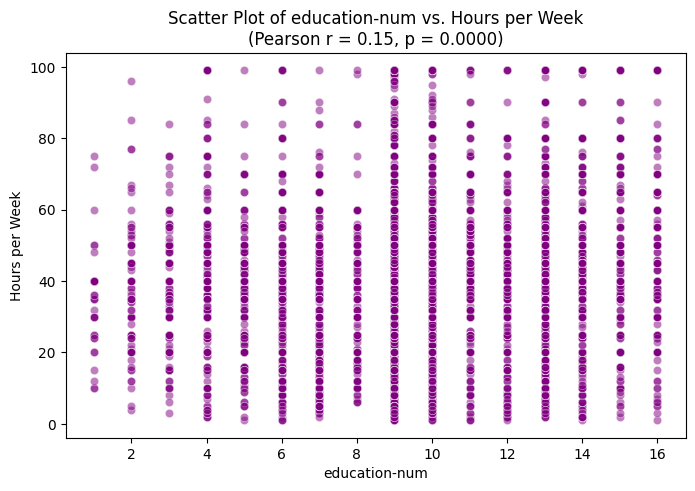


 Most Correlated Variable with 'hours-per-week': education-num
Pearson r: 0.1481
P-value: 0.0000


In [66]:
from scipy.stats import pearsonr

# Selecting only numerical columns
numerical_data = data.select_dtypes(include=["number"])
columns = numerical_data.columns
target_var = "hours-per-week"

# Computing Pearson correlations and p-values
correlation_matrix = {}
p_value_matrix = {}

for col in columns:
    correlation_matrix[col] = {}
    p_value_matrix[col] = {}
    for col2 in columns:
        if col == col2:
            correlation_matrix[col][col2] = 1.0
            p_value_matrix[col][col2] = 0.0
        else:
            corr, p_value = pearsonr(numerical_data[col], numerical_data[col2])
            correlation_matrix[col][col2] = corr
            p_value_matrix[col][col2] = p_value

# Printing the full correlation matrix
print("\n Pearson Correlation Matrix:")
for col in columns:
    row = " | ".join([f"{correlation_matrix[col][col2]:.2f}" for col2 in columns])
    print(f"{col}: {row}")

# Plotting the full correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array([[correlation_matrix[i][j] for j in columns] for i in columns]), 
            annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
            xticklabels=columns, yticklabels=columns)
plt.title("Pearson Correlation Matrix of Numerical Variables")
plt.show()

# Extracting correlations only with 'hours-per-week' and print
print("\n Correlations with 'hours-per-week':")
target_correlations = {col: correlation_matrix[col][target_var] for col in columns if col != target_var}
for col, value in target_correlations.items():
    print(f"{col}: Pearson r = {value:.4f}")

# heatmap for correlations with 'hours-per-week'
plt.figure(figsize=(8, 1.5))  # Adjusted size for horizontal display
sns.heatmap(np.array(list(target_correlations.values())).reshape(1, -1), 
            annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1,
            xticklabels=list(target_correlations.keys()), yticklabels=["Hours per Week"])
plt.title("Pearson Correlation of Hours per Week with Other Numerical Variables")
plt.show()

# Printing p-values for correlations with 'hours-per-week'
print("\n P-Values for Correlations with 'hours-per-week':")
for col in columns:
    if col != target_var:
        print(f"{col}: p-value = {p_value_matrix[col][target_var]:.4f}")

# Identify the most correlated variable
most_correlated_var = max(target_correlations, key=target_correlations.get)
most_correlated_p = p_value_matrix[most_correlated_var][target_var]

# Scatter plot of the most correlated variable
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[most_correlated_var], y=data[target_var], alpha=0.5, color="purple")

# Labels and title
plt.xlabel(most_correlated_var)
plt.ylabel("Hours per Week")
plt.title(f"Scatter Plot of {most_correlated_var} vs. Hours per Week\n"
          f"(Pearson r = {target_correlations[most_correlated_var]:.2f}, "
          f"p = {most_correlated_p:.4f})")

plt.show()

# Printing correlation and p-value for the strongest correlation
print(f"\n Most Correlated Variable with 'hours-per-week': {most_correlated_var}")
print(f"Pearson r: {target_correlations[most_correlated_var]:.4f}")
print(f"P-value: {most_correlated_p:.4f}")




 Pearson vs. Spearman Correlations with 'hours-per-week':

ðŸ”¹ age:
   Pearson  r = 0.0688, p = 0.0000
   Spearman r = 0.1429, p = 0.0000

ðŸ”¹ fnlwgt:
   Pearson  r = -0.0188, p = 0.0007
   Spearman r = -0.0216, p = 0.0001

ðŸ”¹ education-num:
   Pearson  r = 0.1481, p = 0.0000
   Spearman r = 0.1672, p = 0.0000

ðŸ”¹ capital-gain:
   Pearson  r = 0.0784, p = 0.0000
   Spearman r = 0.0933, p = 0.0000

ðŸ”¹ capital-loss:
   Pearson  r = 0.0543, p = 0.0000
   Spearman r = 0.0599, p = 0.0000


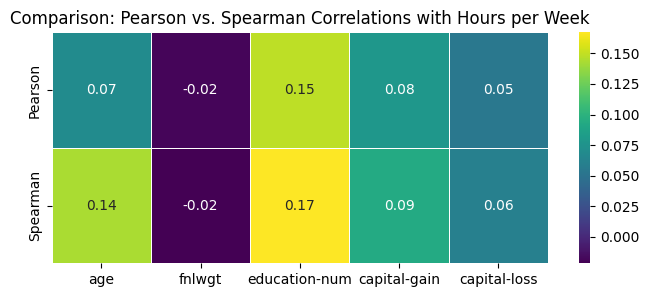

In [67]:

from scipy.stats import spearmanr, pearsonr

# Selecting only numerical columns
numerical_data = data.select_dtypes(include=["number"])
columns = numerical_data.columns
target_var = "hours-per-week"

# Computing Pearson and Spearman correlations + p-values
correlation_results = {}

for col in columns:
    if col != target_var:
        pearson_corr, pearson_p = pearsonr(numerical_data[col], numerical_data[target_var])
        spearman_corr, spearman_p = spearmanr(numerical_data[col], numerical_data[target_var])

        correlation_results[col] = {
            "Pearson r": pearson_corr, "Pearson p": pearson_p,
            "Spearman r": spearman_corr, "Spearman p": spearman_p
        }

# Printing comparison results
print("\n Pearson vs. Spearman Correlations with 'hours-per-week':")
for col, values in correlation_results.items():
    print(f"\nðŸ”¹ {col}:")
    print(f"   Pearson  r = {values['Pearson r']:.4f}, p = {values['Pearson p']:.4f}")
    print(f"   Spearman r = {values['Spearman r']:.4f}, p = {values['Spearman p']:.4f}")

# Plot heatmap comparison
pearson_values = np.array([values["Pearson r"] for values in correlation_results.values()])
spearman_values = np.array([values["Spearman r"] for values in correlation_results.values()])

plt.figure(figsize=(8, 3))
sns.heatmap([pearson_values, spearman_values], annot=True, cmap="viridis", fmt=".2f", linewidths=0.5,
            xticklabels=list(correlation_results.keys()), yticklabels=["Pearson", "Spearman"])
plt.title("Comparison: Pearson vs. Spearman Correlations with Hours per Week")
plt.show()


## Summary report on correlations between Target and numerical data 
We initially conducted Pearson correlation because it is the most commonly used method for measuring linear relationships between continuous numerical variables. Since our goal was to analyze correlations in the raw, unprocessed data, it was important to first observe how Pearson behaves under these conditions. However, given that some variables (e.g., capital-gain, capital-loss, and education-num) contain skewed distributions, outliers, or discrete values, we also computed Spearman correlation. Unlike Pearson, Spearman is a rank-based method, which makes it more robust to outliers and suitable for our analysis. 

A Pearson correlation analysis was conducted to examine the relationships between hours-per-week and other numerical variables. The strongest correlation was found between education-num and hours-per-week (r = 0.15, p < .001), suggesting that individuals with higher education levels tend to work slightly more hours. Other significant but weak correlations included capital-gain (r = 0.08, p < .001), age (r = 0.07, p < .001), and capital-loss (r = 0.05, p < .001).

The correlation between fnlwgt and hours-per-week was the weakest but still statistically significant (r = -0.02, p = .0007), indicating a negligible association. While all correlations reached statistical significance, their effect sizes were small, suggesting that hours-per-week is likely influenced by additional factors. 

To assess the robustness of correlations, both Pearson and Spearman correlation coefficients were computed for hours-per-week and other numerical variables. The results reveal notable differences between the two methods, particularly for age (r = 0.07, p < .001 for Pearson; r = 0.14, p < .001 for Spearman) and education-num (r = 0.15, p < .001 for Pearson; r = 0.17, p < .001 for Spearman). These differences suggest that non-linear relationships or outliers may be influencing the Pearson correlations.

For capital-gain and capital-loss, Spearman correlations were slightly higher than Pearson, indicating that ranking-based relationships might better capture their association with work hours. The weakest correlation was observed for fnlwgt, with negligible differences between Pearson (r = -0.02, p = .0007) and Spearman (r = -0.02, p = .0001), confirming that this variable has minimal influence on hours-per-week.

These findings suggest that Spearman correlation provides a more stable estimate, particularly for variables with non-linear relationships or extreme values.

While our analysis revealed differences between Pearson and Spearman correlations, the overall effect sizes remain weak across all variables. Even though education-num showed the strongest correlation with hours-per-week (r â‰ˆ 0.15â€“0.17), this still indicates a small effect in practical terms.

The scatter plot of education-num vs. hours-per-week further reinforces the weak correlation observed in our analysis. While a slight positive trend can be detected, the high dispersion of data points suggests substantial variability, meaning that individuals with the same education level can still work vastly different hours. This aligns with the correlation values (r â‰ˆ 0.15â€“0.17), indicating that while higher education is associated with working slightly more hours, the relationship is far from deterministic.

The scatter plot also suggests a non-linear pattern, with data clustering around specific education levels, likely due to the categorical nature of education-num. 

# Target and Categorical Variables

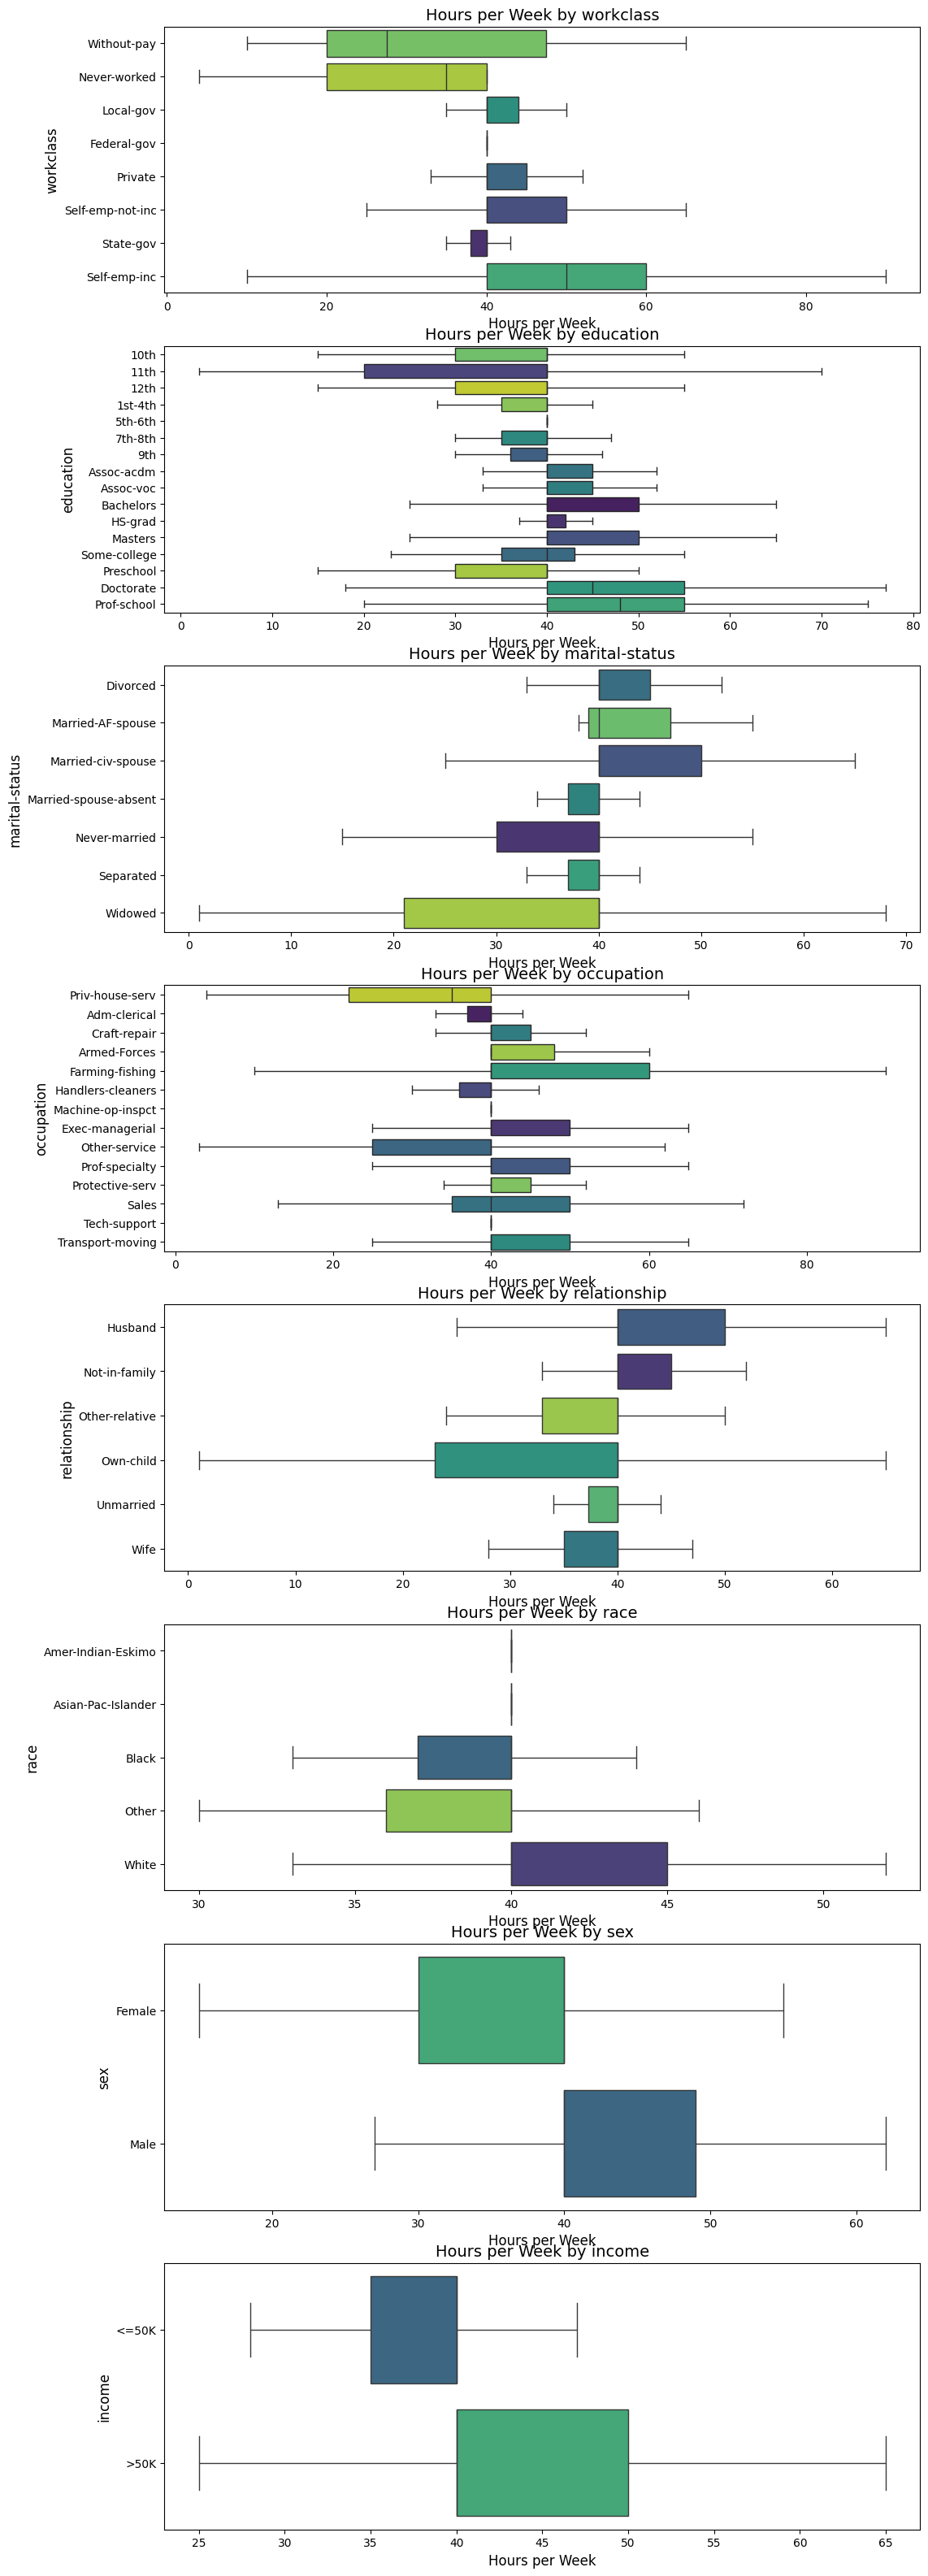

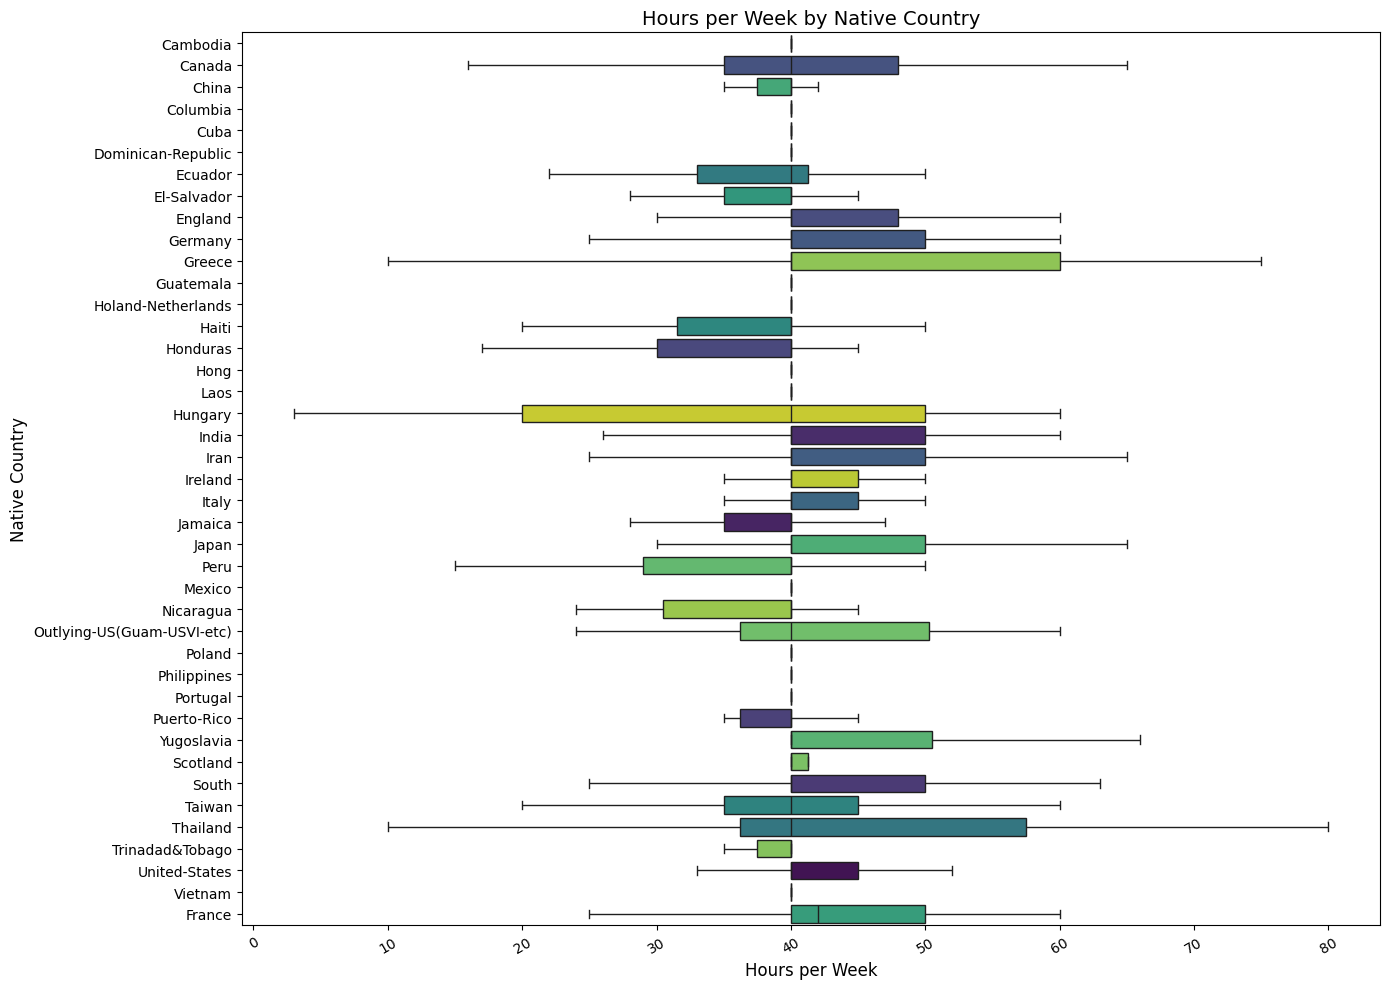

In [68]:
# Get all categorical columns
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

# Move 'native-country' to the end of the list
if "native-country" in categorical_columns:
    categorical_columns.remove("native-country")
    categorical_columns.append("native-country")

# Define figure size dynamically for all except 'native-country'
num_cols = len(categorical_columns) - 1  # Exclude 'native-country' from the count
plt.figure(figsize=(12, 5 * num_cols))

# Create horizontal boxplots for all except 'native-country'
for i, col in enumerate(categorical_columns[:-1]):  # Exclude last element ('native-country')
    plt.subplot(num_cols, 1, i + 1)

    # Sort categories by median hours-per-week for better readability
    sorted_order = data.groupby(col)["hours-per-week"].median().sort_values().index

    
    sns.boxplot(y=data[col], x=data["hours-per-week"], hue=data[col], palette="viridis", showfliers=False, order=sorted_order, legend=False)

    # Formatting
    plt.xlabel("Hours per Week", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.title(f"Hours per Week by {col}", fontsize=14)

# Handle 'native-country' separately with a wider figure
plt.figure(figsize=(14, 10))
sorted_order = data.groupby("native-country")["hours-per-week"].median().sort_values().index


sns.boxplot(y=data["native-country"], x=data["hours-per-week"], hue=data["native-country"], palette="viridis", showfliers=False, order=sorted_order, legend=False)

# Formatting for native-country
plt.xlabel("Hours per Week", fontsize=12)
plt.ylabel("Native Country", fontsize=12)
plt.title("Hours per Week by Native Country", fontsize=14)
plt.xticks(rotation=30)  # Rotate labels for better readability

plt.tight_layout()
plt.show()


## Summary report on Target and Categorical variables

Boxplots illustrate differences in work hours across various demographic and occupational groups. Self-employed individuals exhibit the highest variability, while government and private sector employees have more consistent hours. Higher education levels are associated with slightly longer work hours, though variability remains high.

Among marital statuses, married-civ-spouse individuals tend to work more, whereas widowed and separated groups show greater dispersion. Occupational roles also differ, with managerial and transport-related jobs involving longer hours, while private household service positions have the lowest median.

Men generally work more hours than women, and higher-income individuals (>50K) tend to have longer workweeks, though overlap suggests other influencing factors. Regional variations in work hours are also evident, reflecting possible economic and cultural differences. While patterns emerge, substantial within-group variability suggests that work hours are shaped by multiple interacting factors beyond these categories.

# EDA conclusion report

Our exploratory analysis highlighted notable patterns and variabilities in hours worked per week across demographic, occupational, and regional factors. Education, marital status, occupation, and income showed measurable associations with work hours, with higher education levels and income generally linked to longer working hours, though the effects remained weak. Despite these trends, substantial within-group variability suggests that additional socioeconomic, industry-specific, and personal factors contribute to differences in work hours.

Correlation analyses using both Pearson and Spearman methods revealed weak but statistically significant relationships. The scatter and boxplots further illustrated this, showing high dispersion within categories, indicating that individuals with similar backgrounds can have vastly different work schedules.

Regarding regional differences, the analysis was heavily influenced by the dominance of U.S. data, limiting direct cross-country comparisons. Some countries displayed greater variability in work hours, potentially reflecting economic conditions, labor policies, or cultural expectations, but due to smaller sample sizes, these findings should be interpreted cautiously.

We also identified several anomalies and unexpected trends in work hours. Extreme outliers, including individuals reporting as little as 1 hour or as many as 99 hours per week, suggest potential data entry errors, self-reporting biases, or irregular work conditions. Additionally, capital-gain and capital-loss variables exhibited extreme skewness, indicating that only a small subset of individuals report significant financial changes.

Despite expectations, education and income showed only weak correlations with hours worked (r < 0.2), suggesting that external factors, such as industry type or labor laws, may play a larger role. Certain occupational and education categories also displayed unexpected work hour distributions, with some lower education levels showing high work hours and self-employed individuals exhibiting extreme variability.

The country-based analysis was heavily skewed toward the U.S., limiting international comparisons. Some regions displayed greater dispersion in work hours, likely reflecting local labor conditions or reporting inconsistencies. These findings emphasize the need for careful data cleaning, contextual interpretation, and further analysis to account for unmeasured influences on work hours.

Ultimately, our findings suggest that work hours are influenced by a complex interplay of multiple factors beyond those captured in this dataset. While clear trends exist, high dispersion and weak correlations indicate that for ex. individual-level circumstances, job demands, and external economic conditions likely play a larger role in determining work hours than any single demographic variable

# Preprocessed Dataset EDA

In [69]:
# Importing the CSV file into a DataFrame
pd_data = pd.read_csv(r"D:\ADC\Machine Learning\ubb-sociology-ml\final_project\preprocessed_data.csv")  # Note: Other file paths (e.g., relative paths) werent working.
# Only this local data path was functional for loading the dataset.

# Displaying the first few rows
pd_data.head()


age    fnlwgt  education  education-num  hours-per-week  income  \
0 -0.022125  0.392873          7              9              40       0   
1  1.246842  0.611620          5              7              40       0   
2 -0.868102  1.800681         11             13              40       0   
3 -0.106722  1.183410         12             14              40       0   
4  1.162244  0.324021          7              9              45       1   

   workclass_local-gov  workclass_private  workclass_self-emp-inc  \
0                False               True                   False   
1                False               True                   False   
2                False               True                   False   
3                False               True                   False   
4                False              False                   False   

   workclass_self-emp-not-inc  ...  race_other  race_white  age_binned  \
0                       False  ...       False        True           1   
1                       False  ...       False       False           2   
2                       False  ...       False       False           1   
3                       False  ...       False        True           1   
4                        True  ...       False        True           2   

   age_education_interaction  workclass_encoded  occupation_encoded  \
0                  -0.269484           0.761184            0.046747   
1                  -0.082337           0.761184            0.046747   
2                  -0.127510           0.761184            0.124411   
3                   0.866309           0.761184            0.126052   
4                   0.543640           0.061041            0.126052   

   continent_Europe  continent_North America  continent_Oceania  \
0             False                     True              False   
1             False                     True              False   
2             False                     True              False   
3             False                     True              False   
4             False                     True              False   

   continent_South America  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 89 columns]

In [70]:
pd_data.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'hours-per-week',
       'income', 'workclass_local-gov', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_self-emp-not-inc',
       'workclass_state-gov', 'workclass_without-pay',
       'occupation_armed-forces', 'occupation_craft-repair',
       'occupation_exec-managerial', 'occupation_farming-fishing',
       'occupation_handlers-cleaners', 'occupation_machine-op-inspct',
       'occupation_other-service', 'occupation_priv-house-serv',
       'occupation_prof-specialty', 'occupation_protective-serv',
       'occupation_sales', 'occupation_tech-support',
       'occupation_transport-moving', 'sex_male', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-cou

## Hours per week target distribution

In [71]:
from scipy.stats import skew, kurtosis, zscore, norm, kstest

def analyze_hours_per_week(pd_data, column="hours-per-week"):
    """
    Exploratory Data Analysis (EDA) on the target variable 'hours-per-week':
    - Histogram with normal distribution overlay
    - KDE density plot
    - Skewness and kurtosis with interpretation
    - Outlier detection (IQR and Z-score)
    - Boxplot and violin plot
    - Q-Q plot (normality)
    - Kolmogorov-Smirnov Test (normality)
    """

    # Computing Descriptive Statistics
    mu = np.mean(pd_data[column])
    sigma = np.std(pd_data[column])
    skewness = skew(pd_data[column])
    kurt = kurtosis(pd_data[column])

    print(f"\n**Summary Statistics for {column}:**")
    print(f"Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}")

    # Skewness Interpretation
    if -0.5 <= skewness <= 0.5:
        skew_interpretation = "Approximately symmetric"
    elif -1 <= skewness < -0.5:
        skew_interpretation = "Moderately left-skewed"
    elif 0.5 < skewness <= 1:
        skew_interpretation = "Moderately right-skewed"
    elif skewness < -1:
        skew_interpretation = "Highly left-skewed"
    else:
        skew_interpretation = "Highly right-skewed"

    print(f"Skewness: {skewness:.2f} â†’ {skew_interpretation}")

    # Kurtosis Interpretation (Using Excess Kurtosis)
    excess_kurt = kurt - 3
    if -1 <= excess_kurt <= 1:
        kurt_interpretation = "Approximately normal (mesokurtic)"
    elif excess_kurt > 1:
        kurt_interpretation = "Heavy-tailed (leptokurtic)"
    else:
        kurt_interpretation = "Light-tailed (platykurtic)"

    print(f"Kurtosis: {kurt:.2f} â†’ {kurt_interpretation}")

    # Plot Histogram with Normal Distribution Overlay
    plt.figure(figsize=(8, 5))
    sns.histplot(pd_data[column], bins=30, stat="density", color="purple", edgecolor="black", kde=True, alpha=0.6, label="Histogram")
    x = np.linspace(min(pd_data[column]), max(pd_data[column]), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), color="yellow", linestyle="dashed", linewidth=2, label="Normal Distribution")
    plt.xlabel("Hours per Week")
    plt.ylabel("Density")
    plt.title(f"Histogram with Normal Distribution of {column}")
    plt.legend()
    plt.show()

    # KDE Density Plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(pd_data[column], color="purple", linewidth=2.5, fill=True, alpha=0.3, label="KDE Density Curve")
    plt.xlabel("Hours per Week")
    plt.ylabel("Density")
    plt.title(f"Density Plot of {column}")
    plt.legend()
    plt.show()

    # Outlier Detection - IQR Method
    Q1 = pd_data[column].quantile(0.25)
    Q3 = pd_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = pd_data[(pd_data[column] < lower_bound) | (pd_data[column] > upper_bound)]
    print(f"\nOutliers detected using IQR Method: {len(outliers_iqr)}")
    print(f" - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    # Outlier Detection - Z-score Method
    z_scores = zscore(pd_data[column])
    outliers_z = pd_data[np.abs(z_scores) > 3]
    print(f"Outliers detected using Z-score Method (>|3| standard deviations): {len(outliers_z)}")

    # Boxplot for Outlier Visualization
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=pd_data[column], color="purple")
    plt.xlabel("Hours per Week")
    plt.title(f"Boxplot for Outlier Detection in {column}")
    plt.show()

    # Violin Plot for Distribution Shape
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=pd_data[column], color="purple")
    plt.xlabel("Hours per Week")
    plt.title("Violin Plot of Hours per Week")
    plt.show()

    # Kolmogorov-Smirnov Test for Normality
    ks_stat, ks_p = kstest(pd_data["hours-per-week"], "norm", args=(np.mean(pd_data["hours-per-week"]), np.std(pd_data["hours-per-week"])))

    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

    if ks_p > 0.05:
        print(" Fail to reject H0: Data does not significantly deviate from normality.")
    else:
        print(" Reject H0: Data significantly deviates from normality.")



**Summary Statistics for hours-per-week:**
Mean: 41.49, Standard Deviation: 3.96
Skewness: 1.06 â†’ Highly right-skewed
Kurtosis: 0.49 â†’ Light-tailed (platykurtic)


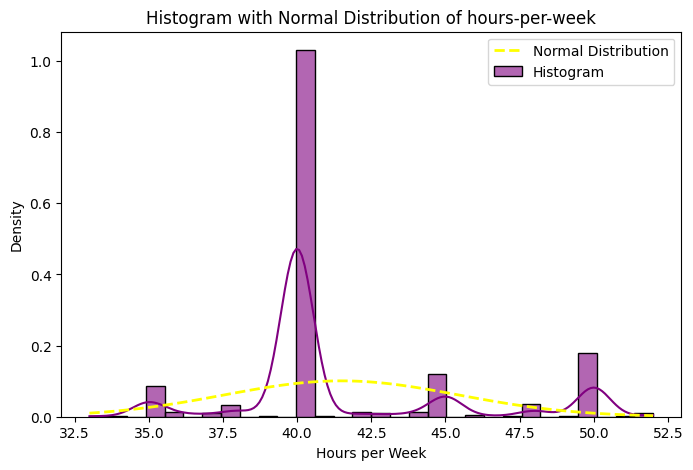

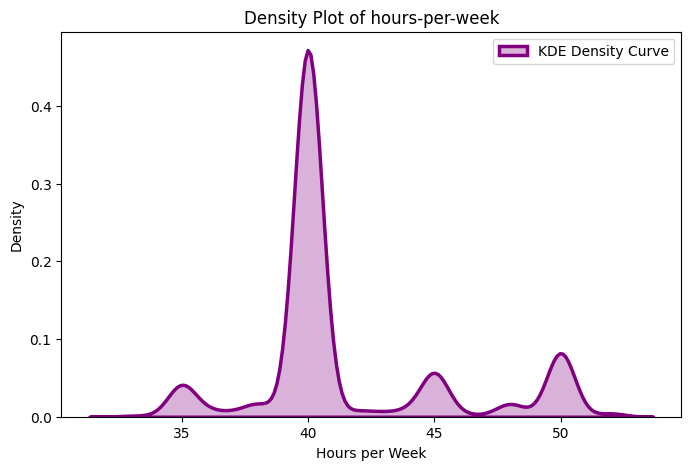


Outliers detected using IQR Method: 6321
 - Lower Bound: 38.50, Upper Bound: 42.50
Outliers detected using Z-score Method (>|3| standard deviations): 0


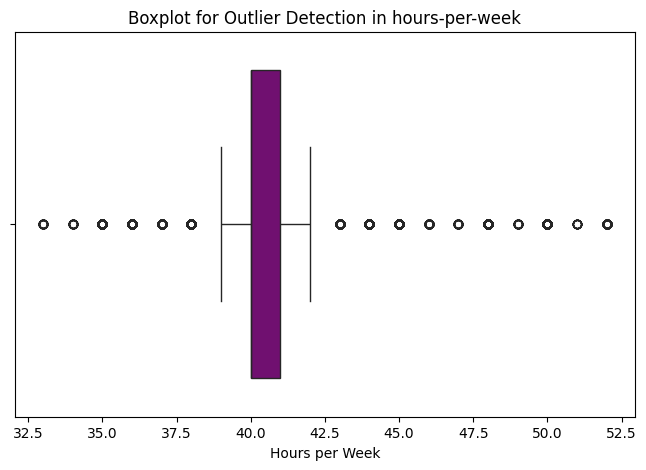

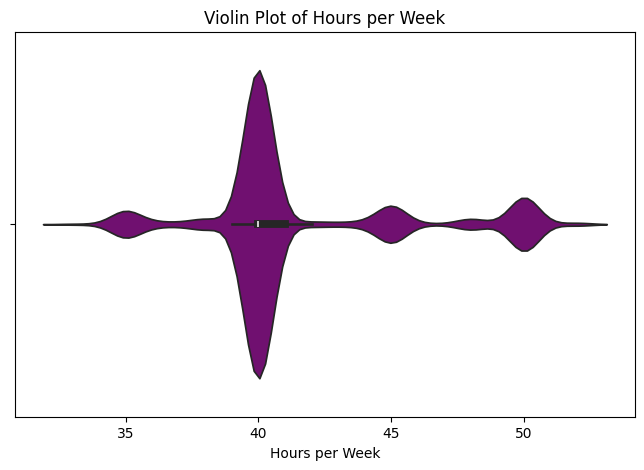

Kolmogorov-Smirnov Test: Statistic = 0.3962, p-value = 0.0000
 Reject H0: Data significantly deviates from normality.


In [72]:
analyze_hours_per_week(pd_data)

### Summary report target variable

After preprocessing the data, the hours-per-week variable had a mean of 41.49 hours (SD = 3.96), with a highly right-skewed distribution (skewness = 1.06) and light tails (kurtosis = 0.49, platykurtic). The Kolmogorov-Smirnov test indicated a significant deviation from normality, D(26240) = 0.40, p < .001. Outlier detection (IQR) identified 6,321 cases (outside 38.5 â€“ 42.5 hours), while Z-score detection found none.

## Descriptive Statistics

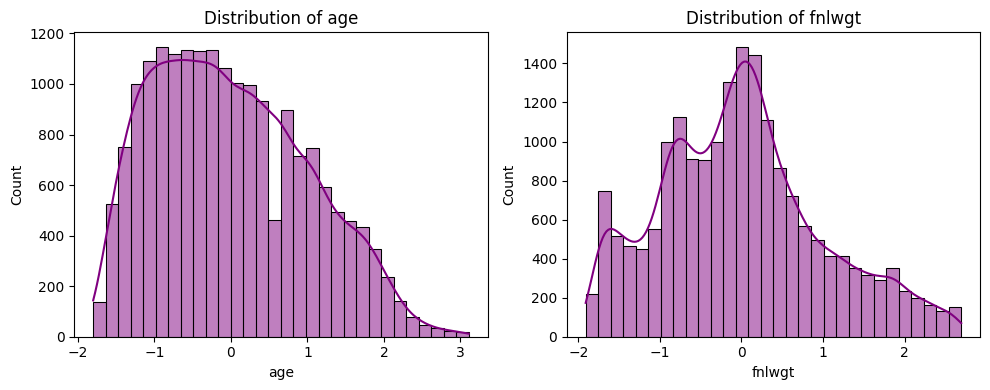

In [73]:
continuous_vars = ["age", "fnlwgt"]

plt.figure(figsize=(10, 4))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, 2, i + 1)
    sns.histplot(pd_data[col], bins=30, kde=True, color="purple", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()



C:\Users\Laura\AppData\Local\Temp\ipykernel_25788\844079012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=pd_data, palette="viridis")
C:\Users\Laura\AppData\Local\Temp\ipykernel_25788\844079012.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(pd_data["education-num"], bins=16, kde=False, palette="viridis", edgecolor="black")


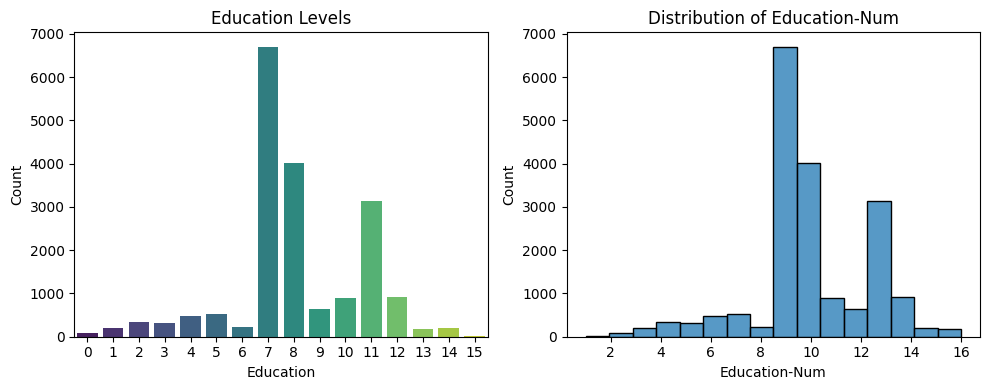

In [74]:
plt.figure(figsize=(10, 4))

# Education (Categorical, Bar Plot)
plt.subplot(1, 2, 1)
sns.countplot(x="education", data=pd_data, palette="viridis")
plt.xticks(rotation=0)
plt.title("Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")

# Education-num (Ordinal, Histogram)
plt.subplot(1, 2, 2)
sns.histplot(pd_data["education-num"], bins=16, kde=False, palette="viridis", edgecolor="black")
plt.title("Distribution of Education-Num")
plt.xlabel("Education-Num")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


C:\Users\Laura\AppData\Local\Temp\ipykernel_25788\3804552858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="income", data=pd_data, palette="viridis")


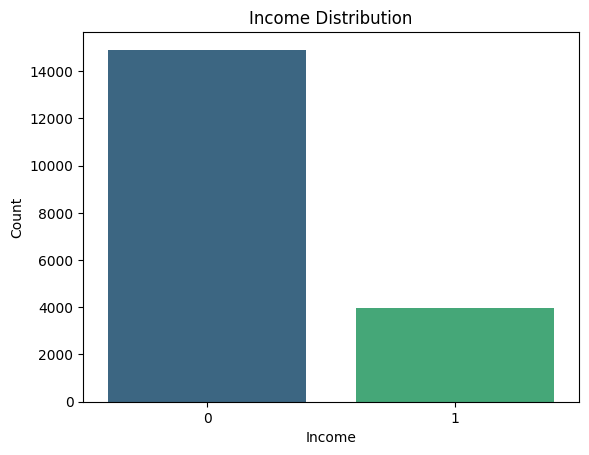

In [75]:
sns.countplot(x="income", data=pd_data, palette="viridis")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


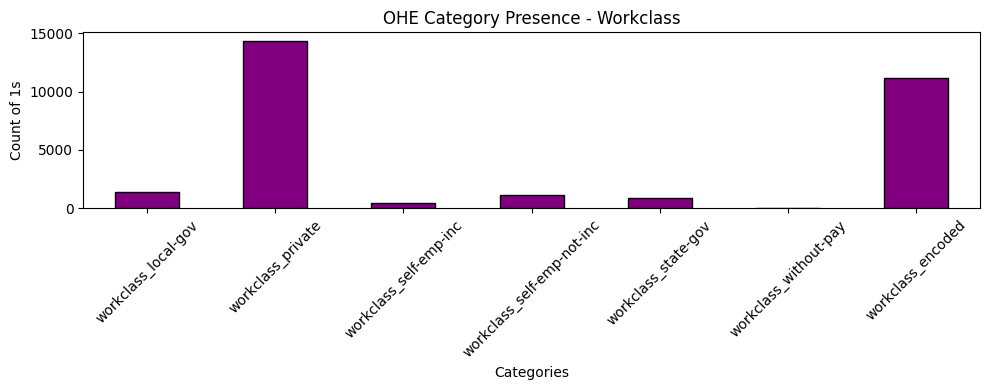

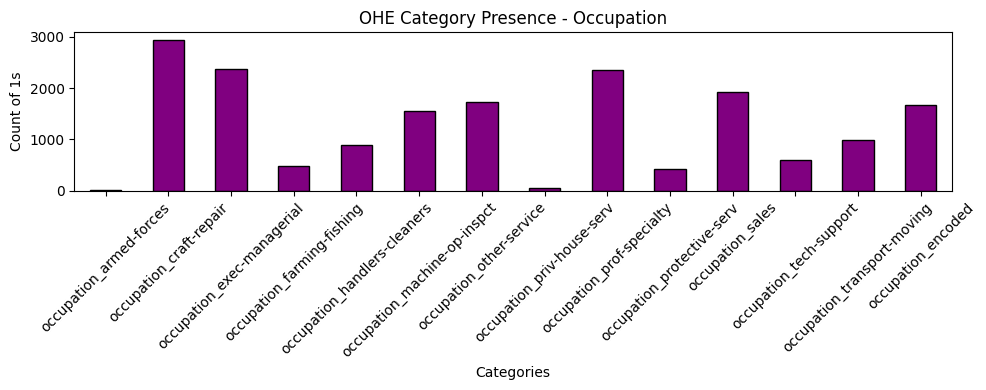

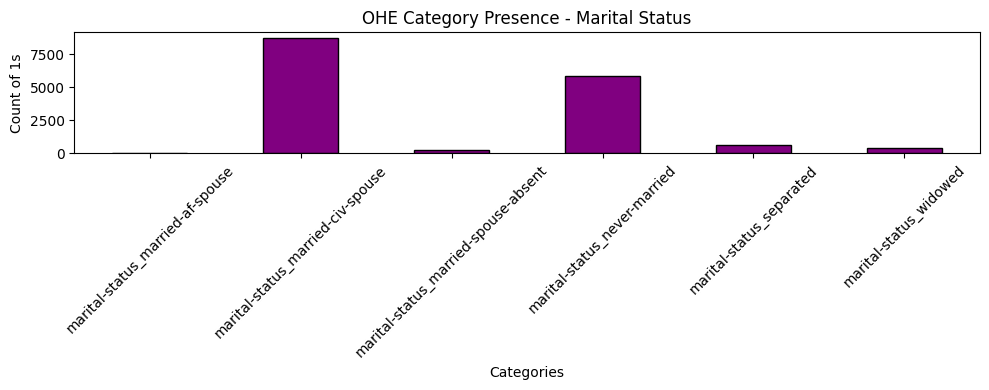

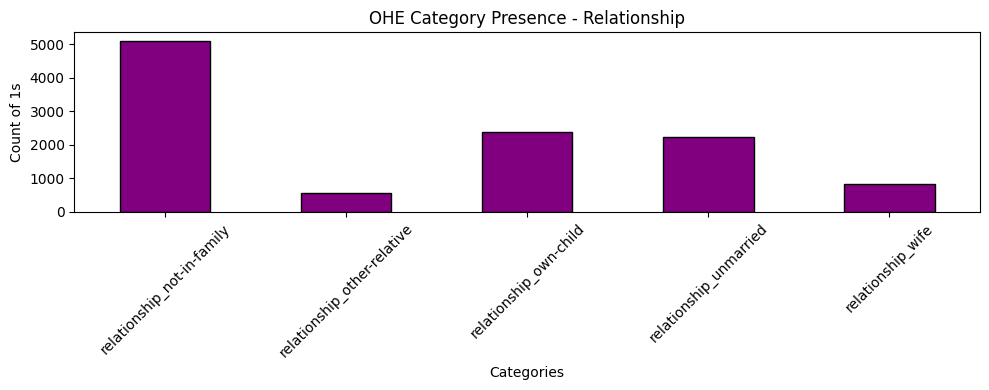

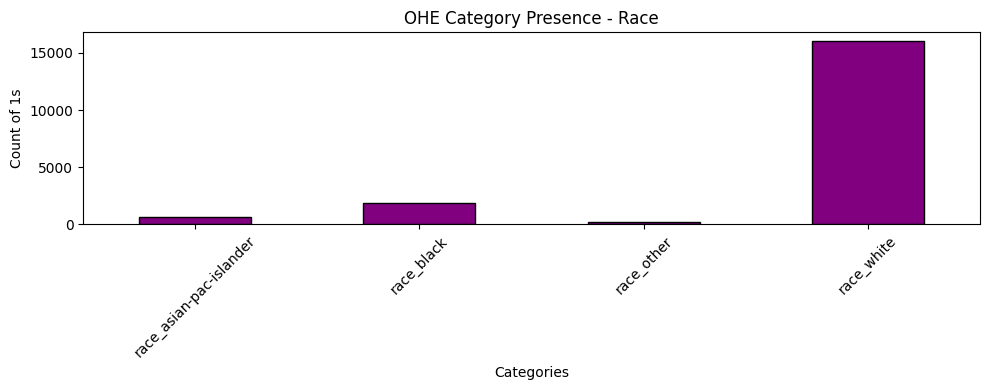

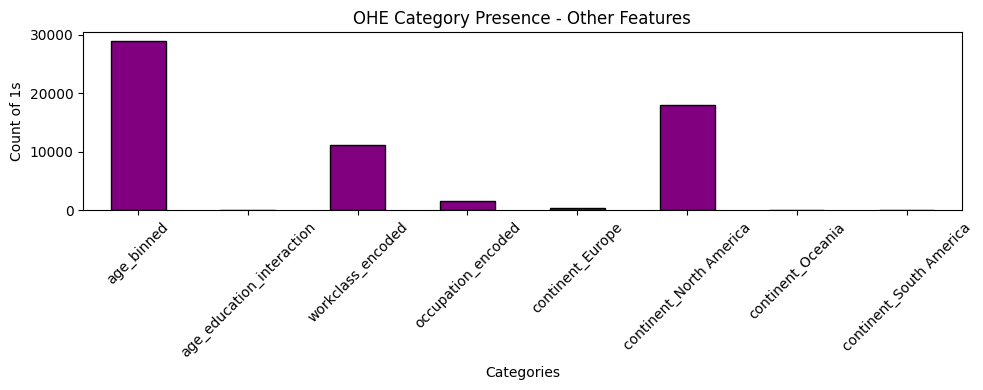

In [76]:
# Define the OHE columns
ohe_columns = [
    'workclass_local-gov', 'workclass_private', 'workclass_self-emp-inc', 'workclass_self-emp-not-inc',
    'workclass_state-gov', 'workclass_without-pay', 'occupation_armed-forces', 'occupation_craft-repair',
    'occupation_exec-managerial', 'occupation_farming-fishing', 'occupation_handlers-cleaners', 'occupation_machine-op-inspct',
    'occupation_other-service', 'occupation_priv-house-serv', 'occupation_prof-specialty', 'occupation_protective-serv',
    'occupation_sales', 'occupation_tech-support', 'occupation_transport-moving', 'sex_male', 'marital-status_married-af-spouse', 'marital-status_married-civ-spouse',
    'marital-status_married-spouse-absent', 'marital-status_never-married', 'marital-status_separated', 'marital-status_widowed',
    'relationship_not-in-family', 'relationship_other-relative', 'relationship_own-child', 'relationship_unmarried', 'relationship_wife',
    'race_asian-pac-islander', 'race_black', 'race_other', 'race_white', 'age_binned', 'age_education_interaction', 'workclass_encoded',
    'occupation_encoded', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America'
]

# Define OHE groups by prefixes
ohe_groups = {
    "Workclass": [col for col in ohe_columns if col.startswith("workclass_")],
    "Occupation": [col for col in ohe_columns if col.startswith("occupation_")],
    "Marital Status": [col for col in ohe_columns if col.startswith("marital-status_")],
    "Relationship": [col for col in ohe_columns if col.startswith("relationship_")],
    "Race": [col for col in ohe_columns if col.startswith("race_")],
    "Other Features": [
        "age_binned", "age_education_interaction", "workclass_encoded", "occupation_encoded",
        "continent_Europe", "continent_North America", "continent_Oceania", "continent_South America"
    ],
}

# Plot each group
for group, cols in ohe_groups.items():
    if not cols:
        continue
    
    plt.figure(figsize=(10, 4))
    pd_data[cols].sum().plot(kind="bar", color="purple", edgecolor="black")
    plt.title(f"OHE Category Presence - {group}")
    plt.ylabel("Count of 1s")
    plt.xlabel("Categories")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Summary report on descriptives

Age and fnlwgt exhibited right-skewed distributions, with a higher concentration in younger ages and lower weights, though a long tail persisted. Education-num, an ordinal variable, showed peaks at specific levels, particularly at 9 (High School) and 10 (Some College). Income, as a binary variable, demonstrated class imbalance, with the majority earning less than or equal to 50K.

The analysis of the one-hot encoded (OHE) variables revealed the distribution of categories across multiple features. The workclass and occupation variables exhibited the highest frequencies for "Private" and "Craft-repair," respectively. Marital status was predominantly "Married-civ-spouse," while "Not-in-family" was the most common relationship type. The race distribution highlighted "White" as the majority. The custom features such as age binning and continent encoding indicated that most individuals were from "North America." These distributions confirm the dataset's imbalance toward specific categories, especially reflecting the dominance of U.S.-based individuals.

## Correlations

In [77]:
from scipy.stats import pearsonr, spearmanr, pointbiserialr

# Defining variable groups
continuous_vars = ['age', 'fnlwgt']
ordinal_vars = ['education-num']
binary_vars = ['income']
ohe_vars = [col for col in pd_data.columns if col not in continuous_vars + ordinal_vars + binary_vars + ['hours-per-week']]

# Storing correlation results
correlation_results = []

# Pearson and Spearman for continuous variables
for var in continuous_vars:
    pearson_r, pearson_p = pearsonr(pd_data[var], pd_data['hours-per-week'])
    spearman_r, spearman_p = spearmanr(pd_data[var], pd_data['hours-per-week'])
    print(f"{var} (Pearson): r = {pearson_r:.4f}, p = {pearson_p:.4g}")
    print(f"{var} (Spearman): r = {spearman_r:.4f}, p = {spearman_p:.4g}")
    print("-" * 40)

# Spearman for ordinal variables
for var in ordinal_vars:
    spearman_r, spearman_p = spearmanr(pd_data[var], pd_data['hours-per-week'])
    print(f"{var} (Spearman): r = {spearman_r:.4f}, p = {spearman_p:.4g}")
    print("-" * 40)

# Point-Biserial for binary and OHE variables
for var in binary_vars + ohe_vars:
    point_biserial_r, point_biserial_p = pearsonr(pd_data[var], pd_data['hours-per-week'])
    print(f"{var} (Point-Biserial / Pearson): r = {point_biserial_r:.4f}, p = {point_biserial_p:.4g}")
    print("-" * 40)


age (Pearson): r = 0.0447, p = 7.832e-10
age (Spearman): r = 0.0542, p = 9.061e-14
----------------------------------------
fnlwgt (Pearson): r = -0.0203, p = 0.005331
fnlwgt (Spearman): r = -0.0184, p = 0.01154
----------------------------------------
education-num (Spearman): r = 0.1186, p = 3.735e-60
----------------------------------------
income (Point-Biserial / Pearson): r = 0.1712, p = 3.521e-124
----------------------------------------
education (Point-Biserial / Pearson): r = 0.1229, p = 1.891e-64
----------------------------------------
workclass_local-gov (Point-Biserial / Pearson): r = -0.0323, p = 8.97e-06
----------------------------------------
workclass_private (Point-Biserial / Pearson): r = -0.0375, p = 2.545e-07
----------------------------------------
workclass_self-emp-inc (Point-Biserial / Pearson): r = 0.0945, p = 1.015e-38
----------------------------------------
workclass_self-emp-not-inc (Point-Biserial / Pearson): r = 0.0904, p = 1.491e-35
------------------

C:\Users\Laura\AppData\Local\Temp\ipykernel_25788\4195827884.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  point_biserial_r, point_biserial_p = pearsonr(pd_data[var], pd_data['hours-per-week'])


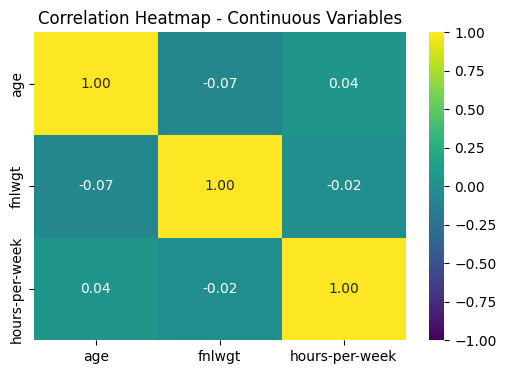

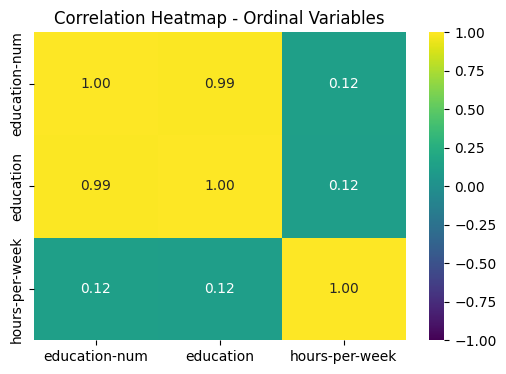

In [78]:
# Selecting continuous and ordinal variables
continuous_vars = ["age", "fnlwgt"]
ordinal_vars = ["education-num", "education"]

# Extracting the relevant variables along with the target variable
continuous_corr = pd_data[continuous_vars + ["hours-per-week"]].corr(method="pearson")
ordinal_corr = pd_data[ordinal_vars + ["hours-per-week"]].corr(method="spearman")

# Plotting Continuous Variables Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(continuous_corr, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Continuous Variables")
plt.show()

# Plotting Ordinal Variables Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(ordinal_corr, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Ordinal Variables")
plt.show()


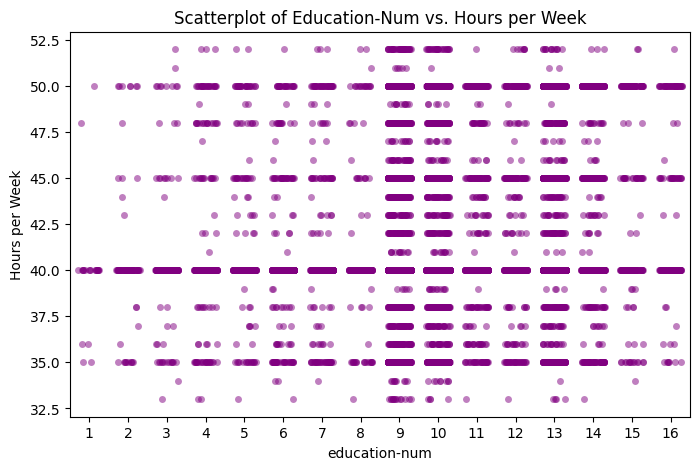

In [79]:
plt.figure(figsize=(8, 5))
sns.stripplot(x="education-num", y="hours-per-week", data=pd_data, jitter=0.3, alpha=0.5, color="purple")
plt.ylabel("Hours per Week")
plt.title("Scatterplot of Education-Num vs. Hours per Week")
plt.show()


### Summary report correlations

We extended the correlation analysis beyond continuous variables because, although the requirement specified numerical data, we recognized that limiting the analysis to only two continuous variables (age and fnlwgt) would provide an incomplete picture. Given that most features became numerical after encoding, we included all numeric columns to capture potential associations with the target variable.We acknowledged that most of the variables were not truly continuous but became numerical through encoding. Therefore, we adjusted the correlation methods accordingly, using Spearman for ordinal variables and Point-Biserial (Pearson) for binary and one-hot encoded features.

The correlation analysis revealed that the strongest association with hours-per-week among the ordinal variables was education-num (Spearman r=.12, 
p<.001), while the weakest was education (Point-biserial r=.12, p<.001). For the continuous variables, age showed the strongest correlation (Pearson r=.04, p<.001). The weakest correlation with hours-per-week across all variables was observed for native-country_Canada (Point-biserial r=âˆ’.0004, p=.951), indicating a negligible and statistically non-significant relationship. 

Across all variables, the strongest correlation overall was observed for sex_male (Point-biserial r = .17, p < .001), indicating that men tended to work more hours per week.

A scatterplot was created to visualize the relationship between education-num and hours-per-week. Due to the discrete nature of both variables, many data points overlapped, particularly at 40 and 50 working hours, and at education levels 9, 10, and 13. To address overplotting, jitter was applied, revealing a slightly positive trend, consistent with the Spearman correlation (r = 0.12, p < .001). However, the relationship remains weak. 

While statistically significant correlations were detected, all observed relationships remain weak, indicating that individual features contribute only minimally to explaining the variance in working hours per week.

# Final Report on Exploratory and Correlation Analysis of our dataset and preprocessed dataset

We conducted an exploratory data analysis (EDA) and correlation assessment on two versions of the dataset, referred to as data (raw) and pd_data (preprocessed with encoding).

While statistical relationships were broadly consistent, encoding increased granularity, emphasizing the sparse and imbalanced nature of categorical features.
Weak correlations in pd_data often reflected rare categories, warranting careful interpretation and potential grouping of infrequent levels in future steps.

The choice of correlation method was pivotal due to non-continuous variables. We applied Pearson for continuous/binary and Spearman for ordinal variables, ensuring the integrity of results across data and pd_data.

Both datasets revealed weak correlations overall, with no single feature demonstrating a strong linear relationship with hours-per-week. Notably, sex_male exhibited the strongest correlation in pd_data, while education-num consistently showed weak positive associations in both datasets. These findings highlight the complex and likely non-linear nature of the relationship between working hours and individual and work-related characteristics.
